# Titanic ML Competition - Predict Survival

### This will be the first dataset everyone starts for kaggle competitions. The dataset is easy to interpret and can start with the basic libraries like numpy, pandas, seaborn & matplotlib. The objective is to predict whether a passenger in titanic survived or not survived based on the features or predictor variables.

### More data analysis and feature additions can be made but in this notebook only basic EDA & data cleaning is covered for easier understanding. 

### Machine learning part covers almost all basic ways of building a model with hyper paramter tuning & cross validation (CV-5). In the evaluation part, the models are evaluated to find the best model and submission is made using best model.

### Keep watching for more versions 

## Part 1 - Import Libraries & Data

### Path of Kaggle Data

In [1]:
## OS library for connecting to data

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


### Importing necessary libraries

In [2]:
## Basic Libraries to read data & analyze data

import numpy as np   
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt 

## Basic Libraries to standardize & split data before modelling

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split

## Basic Libraries to pickle models & model evaluation

import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix, plot_confusion_matrix
from sklearn import metrics
from time import time

## Library to hide warnings in notebook

import warnings
warnings.filterwarnings("ignore")

## Part 2 - Data Analysis & Data Cleaning

### Reading Training Data & Basic EDA

In [3]:
data_train = pd.read_csv("../input/titanic/train.csv")

In [4]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
data_train.shape

(891, 12)

In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### *Possible Missing values in Age, Cabin & Embarked*

In [8]:
data_train.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Name,891,891,"Fahlstrom, Mr. Arne Jonas",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


### Reading Testing Data & Basic EDA

In [9]:
data_test = pd.read_csv("../input/titanic/test.csv")

In [10]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
data_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [12]:
data_test.shape

(418, 11)

In [13]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### *Possible Missing values in Age, Fare & Cabin*

In [14]:
data_test.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,418.0,NaN,NaN,NaN,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,NaN,NaN,NaN,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Name,418,418,"Jonsson, Mr. Nils Hilding",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,418,2,male,266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,332.0,NaN,NaN,NaN,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,NaN,NaN,NaN,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,NaN,NaN,NaN,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Ticket,418,363,PC 17608,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,417.0,NaN,NaN,NaN,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292
Cabin,91,76,B57 B59 B63 B66,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Check - Null, Outliers & Duplicates Train Data

In [15]:
 data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

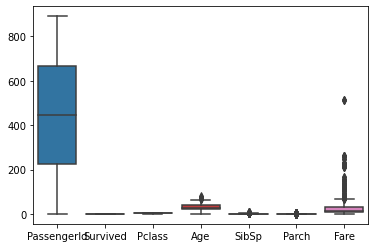

In [16]:
sns.boxplot(data = data_train)

In [17]:
Q1 = data_train.quantile(0.25)
Q3 = data_train.quantile(0.75)
IQR = Q3 - Q1
((data_train < (Q1 - 1.5 * IQR)) | (data_train > (Q3 + 1.5 * IQR))).sum()

Age             11
Cabin            0
Embarked         0
Fare           116
Name             0
Parch          213
PassengerId      0
Pclass           0
Sex              0
SibSp           46
Survived         0
Ticket           0
dtype: int64

In [18]:
 data_train.duplicated().sum()

0

### Data Check - Null, Outliers & Duplicates Test Data

In [19]:
 data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

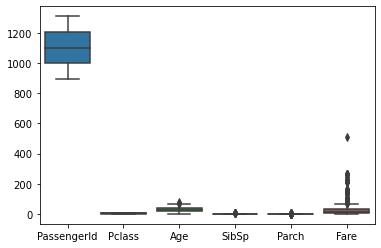

In [20]:
sns.boxplot(data = data_test)

In [21]:
Q1 = data_test.quantile(0.25)
Q3 = data_test.quantile(0.75)
IQR = Q3 - Q1
((data_test < (Q1 - 1.5 * IQR)) | (data_test > (Q3 + 1.5 * IQR))).sum()

Age             2
Cabin           0
Embarked        0
Fare           55
Name            0
Parch          94
PassengerId     0
Pclass          0
Sex             0
SibSp          11
Ticket          0
dtype: int64

In [22]:
 data_test.duplicated().sum()

0

### Data Cleaning - Train Data

In [23]:
data_train['Age'].fillna(value= data_train['Age'].mean(), inplace = True)

In [24]:
 data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [26]:
lratio,uratio=remove_outlier(data_train['Age'])
data_train['Age']=np.where(data_train['Age']>uratio,uratio,data_train['Age'])
data_train['Age']=np.where(data_train['Age']<lratio,lratio,data_train['Age'])

lratio,uratio=remove_outlier(data_train['Fare'])
data_train['Fare']=np.where(data_train['Fare']>uratio,uratio,data_train['Fare'])
data_train['Fare']=np.where(data_train['Fare']<lratio,lratio,data_train['Fare'])

lratio,uratio=remove_outlier(data_train['Parch'])
data_train['Parch']=np.where(data_train['Parch']>uratio,uratio,data_train['Parch'])
data_train['Parch']=np.where(data_train['Parch']<lratio,lratio,data_train['Parch'])

lratio,uratio=remove_outlier(data_train['SibSp'])
data_train['SibSp']=np.where(data_train['SibSp']>uratio,uratio,data_train['SibSp'])
data_train['SibSp']=np.where(data_train['SibSp']<lratio,lratio,data_train['SibSp'])



<AxesSubplot:>

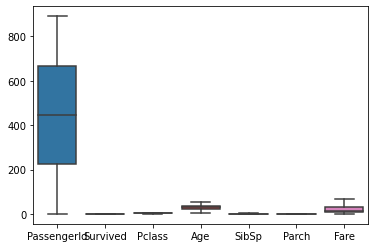

In [27]:
sns.boxplot(data = data_train)

In [28]:
data_train.drop(columns = ['PassengerId', 'Cabin'], inplace = True)


In [29]:
data_train.dropna(inplace = True)

In [30]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Sex       889 non-null    object 
 4   Age       889 non-null    float64
 5   SibSp     889 non-null    float64
 6   Parch     889 non-null    float64
 7   Ticket    889 non-null    object 
 8   Fare      889 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(4), int64(2), object(4)
memory usage: 76.4+ KB


### Data Cleaning - Test Data

In [31]:
data_test['Age'].fillna(value= data_test['Age'].mean(), inplace = True)
data_test['Fare'].fillna(value= data_test['Fare'].mean(), inplace = True)

In [32]:
 data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [33]:
lratio,uratio=remove_outlier(data_test['Age'])
data_test['Age']=np.where(data_test['Age']>uratio,uratio,data_test['Age'])
data_test['Age']=np.where(data_test['Age']<lratio,lratio,data_test['Age'])

lratio,uratio=remove_outlier(data_test['Fare'])
data_test['Fare']=np.where(data_test['Fare']>uratio,uratio,data_test['Fare'])
data_test['Fare']=np.where(data_test['Fare']<lratio,lratio,data_test['Fare'])

lratio,uratio=remove_outlier(data_test['Parch'])
data_test['Parch']=np.where(data_test['Parch']>uratio,uratio,data_test['Parch'])
data_test['Parch']=np.where(data_test['Parch']<lratio,lratio,data_test['Parch'])

lratio,uratio=remove_outlier(data_test['SibSp'])
data_test['SibSp']=np.where(data_test['SibSp']>uratio,uratio,data_test['SibSp'])
data_test['SibSp']=np.where(data_test['SibSp']<lratio,lratio,data_test['SibSp'])

<AxesSubplot:>

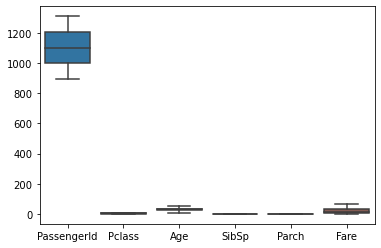

In [34]:
sns.boxplot(data = data_test)

In [35]:
data_test.drop(columns = ['PassengerId', 'Cabin'], inplace = True)

In [36]:
data_test.dropna(inplace = True)

In [37]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    float64
 5   Parch     418 non-null    float64
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Embarked  418 non-null    object 
dtypes: float64(4), int64(1), object(4)
memory usage: 32.7+ KB


### Correlation Check - Train Data (Numerical Variables)

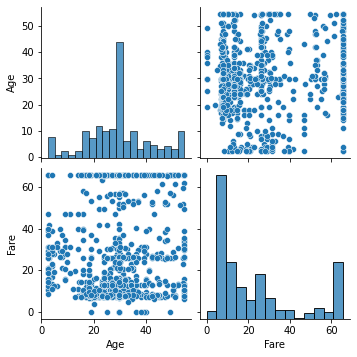

In [38]:
sns.pairplot(data_train[['Age', 'Fare']])

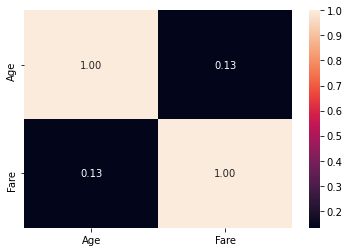

In [39]:
sns.heatmap(data_train[['Age', 'Fare']].corr(), annot=True,fmt='.2f')
plt.show()

### Correlation Check - Test Data (Numerical Variables)

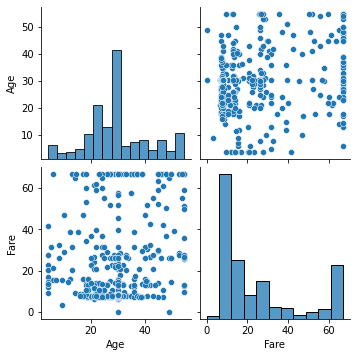

In [40]:
sns.pairplot(data_test[['Age', 'Fare']])

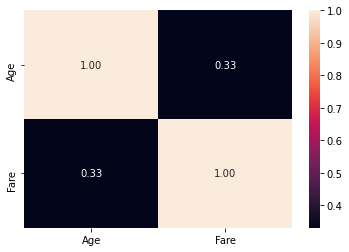

In [41]:
sns.heatmap(data_test[['Age', 'Fare']].corr(), annot=True,fmt='.2f')
plt.show()

### *Not much correlation between variables both in train & test*

### Data Transformation - Train & Test

In [42]:
oneHotCols=['Sex', 'Embarked']

In [43]:
data_train=pd.get_dummies(data_train, columns=oneHotCols)
data_train.head(10)

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",22.000000,1.0,0.0,A/5 21171,7.2500,0,1,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1.0,0.0,PC 17599,65.6344,1,0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",26.000000,0.0,0.0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1.0,0.0,113803,53.1000,1,0,0,0,1
4,0,3,"Allen, Mr. William Henry",35.000000,0.0,0.0,373450,8.0500,0,1,0,0,1
5,0,3,"Moran, Mr. James",29.699118,0.0,0.0,330877,8.4583,0,1,0,1,0
6,0,1,"McCarthy, Mr. Timothy J",54.000000,0.0,0.0,17463,51.8625,0,1,0,0,1
7,0,3,"Palsson, Master. Gosta Leonard",2.500000,2.5,0.0,349909,21.0750,0,1,0,0,1
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.000000,0.0,0.0,347742,11.1333,1,0,0,0,1
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.000000,1.0,0.0,237736,30.0708,1,0,1,0,0


In [44]:
data_test=pd.get_dummies(data_test, columns=oneHotCols)
data_test.head(10)

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,"Kelly, Mr. James",34.500,0.0,0.0,330911,7.8292,0,1,0,1,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",47.000,1.0,0.0,363272,7.0000,1,0,0,0,1
2,2,"Myles, Mr. Thomas Francis",54.875,0.0,0.0,240276,9.6875,0,1,0,1,0
3,3,"Wirz, Mr. Albert",27.000,0.0,0.0,315154,8.6625,0,1,0,0,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.000,1.0,0.0,3101298,12.2875,1,0,0,0,1
5,3,"Svensson, Mr. Johan Cervin",14.000,0.0,0.0,7538,9.2250,0,1,0,0,1
6,3,"Connolly, Miss. Kate",30.000,0.0,0.0,330972,7.6292,1,0,0,1,0
7,2,"Caldwell, Mr. Albert Francis",26.000,1.0,0.0,248738,29.0000,0,1,0,0,1
8,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",18.000,0.0,0.0,2657,7.2292,1,0,1,0,0
9,3,"Davies, Mr. John Samuel",21.000,2.0,0.0,A/4 48871,24.1500,0,1,0,0,1


### Data type conversion for modelling - Train & Test

In [45]:
for feature in data_train.columns: 
    if data_train[feature].dtype == 'object': 
        data_train[feature] = pd.Categorical(data_train[feature]).codes

In [46]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Name        889 non-null    int16  
 3   Age         889 non-null    float64
 4   SibSp       889 non-null    float64
 5   Parch       889 non-null    float64
 6   Ticket      889 non-null    int16  
 7   Fare        889 non-null    float64
 8   Sex_female  889 non-null    uint8  
 9   Sex_male    889 non-null    uint8  
 10  Embarked_C  889 non-null    uint8  
 11  Embarked_Q  889 non-null    uint8  
 12  Embarked_S  889 non-null    uint8  
dtypes: float64(4), int16(2), int64(2), uint8(5)
memory usage: 56.4 KB


In [47]:
for feature in data_test.columns: 
    if data_test[feature].dtype == 'object': 
        data_test[feature] = pd.Categorical(data_test[feature]).codes

In [48]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Name        418 non-null    int16  
 2   Age         418 non-null    float64
 3   SibSp       418 non-null    float64
 4   Parch       418 non-null    float64
 5   Ticket      418 non-null    int16  
 6   Fare        418 non-null    float64
 7   Sex_female  418 non-null    uint8  
 8   Sex_male    418 non-null    uint8  
 9   Embarked_C  418 non-null    uint8  
 10  Embarked_Q  418 non-null    uint8  
 11  Embarked_S  418 non-null    uint8  
dtypes: float64(4), int16(2), int64(1), uint8(5)
memory usage: 23.3 KB


### Standardizing the Train & Test Data

In [49]:
def data_scaling( scaling_strategy , scaling_data , scaling_columns ):
    if    scaling_strategy =="RobustScaler" :
        scaling_data[scaling_columns] = RobustScaler().fit_transform(scaling_data[scaling_columns])
    elif  scaling_strategy =="StandardScaler" :
        scaling_data[scaling_columns] = StandardScaler().fit_transform(scaling_data[scaling_columns])
    elif  scaling_strategy =="MinMaxScaler" :
        scaling_data[scaling_columns] = MinMaxScaler().fit_transform(scaling_data[scaling_columns])
    elif  scaling_strategy =="MaxAbsScaler" :
        scaling_data[scaling_columns] = MaxAbsScaler().fit_transform(scaling_data[scaling_columns])
    else :  # If any other scaling send by mistake still perform Robust Scalar
        scaling_data[scaling_columns] = RobustScaler().fit_transform(scaling_data[scaling_columns])
    return scaling_data
# RobustScaler is better in handling Outliers :
scaling_strategy = ["RobustScaler", "StandardScaler","MinMaxScaler","MaxAbsScaler"]
data_train_scale = data_scaling( scaling_strategy[0] , data_train, data_train.columns )
data_test_scale  = data_scaling( scaling_strategy [0] , data_test, data_test.columns )
# Display Scaled Train and Test Features :
display('Train Head :',data_train_scale.head())
display(data_train_scale.columns)
display('Test Head :',data_test_scale.head())
display(data_test_scale.columns)

'Train Head :'

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,-0.756757,-0.592240,1.0,0.0,0.516667,-0.311813,0.0,0.0,0.0,0.0,0.0
1,1.0,-2.0,-0.572072,0.638529,1.0,0.0,0.719444,2.215190,1.0,-1.0,1.0,0.0,-1.0
2,1.0,0.0,-0.204955,-0.284548,0.0,0.0,0.922222,-0.282598,1.0,-1.0,0.0,0.0,0.0
3,1.0,-2.0,-0.387387,0.407760,1.0,0.0,-0.800000,1.672674,1.0,-1.0,0.0,0.0,0.0
4,0.0,0.0,-0.966216,0.407760,0.0,0.0,0.375000,-0.277188,0.0,0.0,0.0,0.0,0.0


Index(['Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

'Test Head :'

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,-0.011990,0.331562,0.0,0.0,-0.149100,-0.280670,0.0,0.0,0.0,1.0,-1.0
1,0.0,0.932854,1.311954,1.0,0.0,0.205656,-0.315800,1.0,-1.0,0.0,0.0,0.0
2,-0.5,0.290168,1.929601,0.0,0.0,-0.555270,-0.201943,0.0,0.0,0.0,1.0,-1.0
3,0.0,0.956835,-0.256674,0.0,0.0,-0.174807,-0.245367,0.0,0.0,0.0,0.0,0.0
4,0.0,-0.146283,-0.648831,1.0,0.0,-0.221080,-0.091793,1.0,-1.0,0.0,0.0,0.0


Index(['Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

### Boxplot after standardization - Train Data

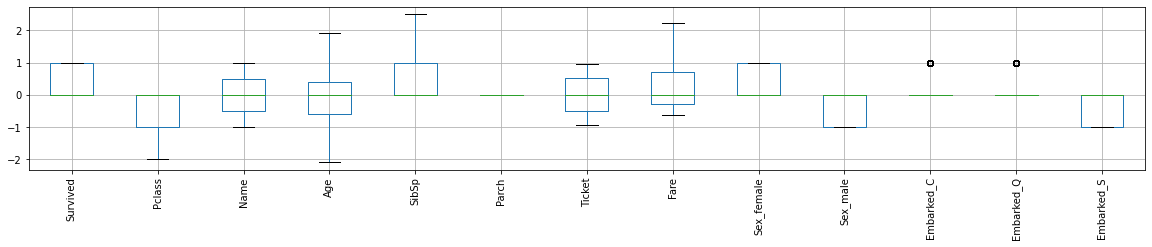

In [50]:
data_train_scale.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

### Boxplot after standardization - Test Data

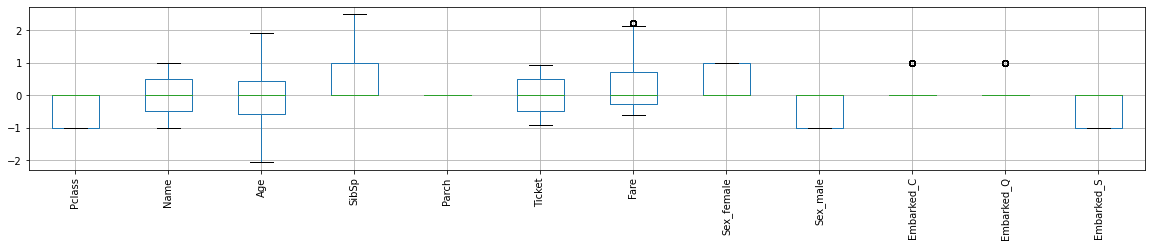

In [51]:
data_test_scale.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

## Part 3 - Predictive Modelling

### Checking proportion the target variable in train data

<AxesSubplot:ylabel='Survived'>

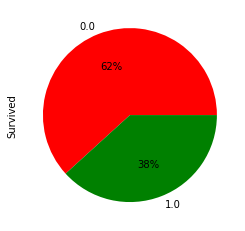

In [52]:
data_train_scale.Survived.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red","green"])

####  0 is Not Survived, 1 is Survived. Proportion is 62:38, balanced.

### Splitting train data into train & train validation

In [53]:
features = data_train_scale.drop('Survived',axis=1)
labels = data_train_scale['Survived']

In [54]:
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size = 0.3, random_state =143)

In [55]:
X_test = data_test_scale

### Shape of train, test & validation data

In [56]:
display('Train shape :',X_train.shape)
display('Test shape :',X_test.shape)
display('Validation shape :',X_val.shape)

'Train shape :'

(622, 12)

'Test shape :'

(418, 12)

'Validation shape :'

(267, 12)

### Defining a function for Best Parameters before modelling

In [57]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

### Building Logistics Regression

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

lr_cv = GridSearchCV(lr, parameters, cv=5)
lr_cv.fit(X_train, y_train.ravel())

print_results(lr_cv)

BEST PARAMS: {'C': 0.1}

0.617 (+/-0.006) for {'C': 0.001}
0.759 (+/-0.041) for {'C': 0.01}
0.78 (+/-0.085) for {'C': 0.1}
0.778 (+/-0.083) for {'C': 1}
0.778 (+/-0.083) for {'C': 10}
0.778 (+/-0.083) for {'C': 100}
0.778 (+/-0.083) for {'C': 1000}


In [60]:
lr_cv.best_estimator_

LogisticRegression(C=0.1)

### Confusion Matrix & ROC curve of Train Data

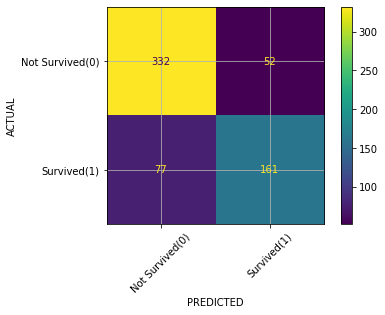

In [61]:
plot_confusion_matrix(lr_cv, X_train, y_train, values_format ='d')
plt.grid(None)
classNames = ['Not Survived(0)', 'Survived(1)']
plt.ylabel('ACTUAL')
plt.xlabel('PREDICTED')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
plt.show();

Area Under Curve: 0.853


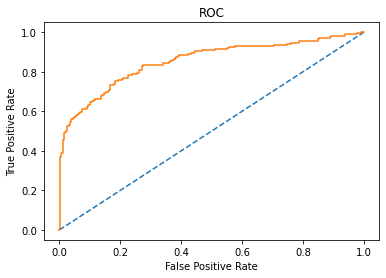

In [62]:
probs = lr_cv.predict_proba(X_train)
probs = probs[:, 1]
log_train_auc = roc_auc_score(y_train, probs)
print('Area Under Curve: %.3f' % log_train_auc)
log_train_fpr, log_train_tpr, log_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(log_train_fpr, log_train_tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.show()

In [63]:
probs = lr_cv.predict_proba(X_val)
probs = probs[:, 1]
log_val_fpr, log_val_tpr, log_val_thresholds = roc_curve(y_val, probs)

In [64]:
joblib.dump(lr_cv.best_estimator_, '../../../LR_model.pkl')

['../../../LR_model.pkl']

### Building Support Vector Machine

In [65]:
from sklearn.svm import SVC

In [66]:
svc = SVC(probability=True)
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
}

svm_cv = GridSearchCV(svc, parameters, cv=5)
svm_cv.fit(X_train, y_train.ravel())

print_results(svm_cv)

BEST PARAMS: {'C': 1, 'kernel': 'rbf'}

0.791 (+/-0.09) for {'C': 0.1, 'kernel': 'linear'}
0.804 (+/-0.07) for {'C': 0.1, 'kernel': 'rbf'}
0.791 (+/-0.09) for {'C': 1, 'kernel': 'linear'}
0.82 (+/-0.086) for {'C': 1, 'kernel': 'rbf'}
0.791 (+/-0.09) for {'C': 10, 'kernel': 'linear'}
0.813 (+/-0.042) for {'C': 10, 'kernel': 'rbf'}


In [67]:
svm_cv.best_estimator_

SVC(C=1, probability=True)

### Confusion Matrix & ROC curve of Train Data

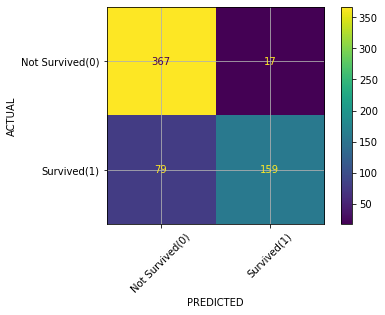

In [68]:
plot_confusion_matrix(svm_cv, X_train, y_train, values_format ='d')
plt.grid(None)
classNames = ['Not Survived(0)', 'Survived(1)']
plt.ylabel('ACTUAL')
plt.xlabel('PREDICTED')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
plt.show();

Area Under Curve: 0.908


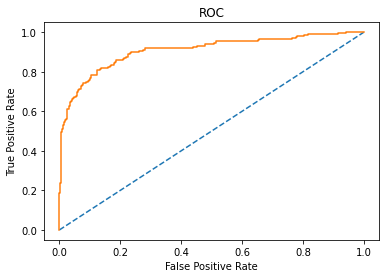

In [69]:
probs = svm_cv.predict_proba(X_train)
probs = probs[:, 1]
svm_train_auc = roc_auc_score(y_train, probs)
print('Area Under Curve: %.3f' % svm_train_auc)
svm_train_fpr, svm_train_tpr, svm_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(svm_train_fpr, svm_train_tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.show()

In [70]:
probs = svm_cv.predict_proba(X_val)
probs = probs[:, 1]
svm_val_fpr, svm_val_tpr, svm_val_thresholds = roc_curve(y_val, probs)

In [71]:
joblib.dump(svm_cv.best_estimator_, '../../../SVM_model.pkl')

['../../../SVM_model.pkl']

### Building MLP Classifier

In [72]:
from sklearn.neural_network import MLPClassifier

In [73]:
mlp = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

mlp_cv = GridSearchCV(mlp, parameters, cv=5)
mlp_cv.fit(X_train, y_train.ravel())
print_results(mlp_cv)

BEST PARAMS: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive'}

0.786 (+/-0.07) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.786 (+/-0.079) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.789 (+/-0.077) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.809 (+/-0.061) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.805 (+/-0.065) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.812 (+/-0.071) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.812 (+/-0.056) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.81 (+/-0.054) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.82 (+/-0.047) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning

In [74]:
mlp_cv.best_estimator_

MLPClassifier(learning_rate='adaptive')

### Confusion Matrix & ROC curve of Train Data

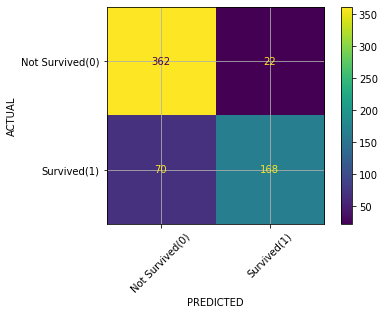

In [75]:
plot_confusion_matrix(mlp_cv, X_train, y_train, values_format ='d')
plt.grid(None)
classNames = ['Not Survived(0)', 'Survived(1)']
plt.ylabel('ACTUAL')
plt.xlabel('PREDICTED')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
plt.show();

Area Under Curve: 0.913


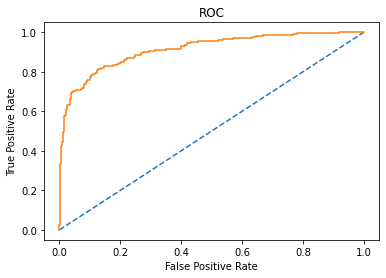

In [76]:
probs = mlp_cv.predict_proba(X_train)
probs = probs[:, 1]
mlp_train_auc = roc_auc_score(y_train, probs)
print('Area Under Curve: %.3f' % mlp_train_auc)
mlp_train_fpr, mlp_train_tpr, mlp_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(mlp_train_fpr, mlp_train_tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.show()

In [77]:
probs = mlp_cv.predict_proba(X_val)
probs = probs[:, 1]
mlp_val_fpr, mlp_val_tpr, mlp_val_thresholds = roc_curve(y_val, probs)

In [78]:
joblib.dump(mlp_cv.best_estimator_, '../../../MLP_model.pkl')

['../../../MLP_model.pkl']

### Building Random Forest Classifier

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

rf_cv = GridSearchCV(rf, parameters, cv=5)
rf_cv.fit(X_train, y_train.ravel())

print_results(rf_cv)

BEST PARAMS: {'max_depth': 4, 'n_estimators': 50}

0.789 (+/-0.089) for {'max_depth': 2, 'n_estimators': 5}
0.789 (+/-0.075) for {'max_depth': 2, 'n_estimators': 50}
0.794 (+/-0.095) for {'max_depth': 2, 'n_estimators': 250}
0.804 (+/-0.083) for {'max_depth': 4, 'n_estimators': 5}
0.825 (+/-0.078) for {'max_depth': 4, 'n_estimators': 50}
0.817 (+/-0.091) for {'max_depth': 4, 'n_estimators': 250}
0.807 (+/-0.086) for {'max_depth': 8, 'n_estimators': 5}
0.818 (+/-0.094) for {'max_depth': 8, 'n_estimators': 50}
0.822 (+/-0.091) for {'max_depth': 8, 'n_estimators': 250}
0.809 (+/-0.052) for {'max_depth': 16, 'n_estimators': 5}
0.82 (+/-0.073) for {'max_depth': 16, 'n_estimators': 50}
0.818 (+/-0.083) for {'max_depth': 16, 'n_estimators': 250}
0.804 (+/-0.086) for {'max_depth': 32, 'n_estimators': 5}
0.809 (+/-0.091) for {'max_depth': 32, 'n_estimators': 50}
0.817 (+/-0.094) for {'max_depth': 32, 'n_estimators': 250}
0.793 (+/-0.064) for {'max_depth': None, 'n_estimators': 5}
0.822 (+/-0.10

In [81]:
rf_cv.best_estimator_

RandomForestClassifier(max_depth=4, n_estimators=50)


### Confusion Matrix & ROC curve of Train Data

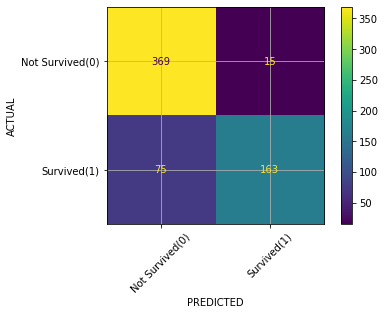

In [82]:

plot_confusion_matrix(rf_cv, X_train, y_train, values_format ='d')
plt.grid(None)
classNames = ['Not Survived(0)', 'Survived(1)']
plt.ylabel('ACTUAL')
plt.xlabel('PREDICTED')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
plt.show();

Area Under Curve: 0.912


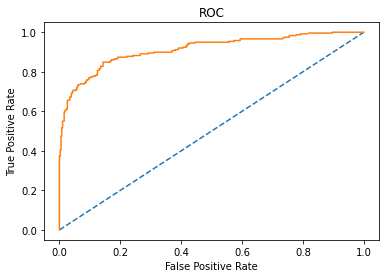

In [83]:
probs = rf_cv.predict_proba(X_train)
probs = probs[:, 1]
rf_train_auc = roc_auc_score(y_train, probs)
print('Area Under Curve: %.3f' % rf_train_auc)
rf_train_fpr, rf_train_tpr, rf_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(rf_train_fpr, rf_train_tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.show()

In [84]:
probs = rf_cv.predict_proba(X_val)
probs = probs[:, 1]
rf_val_fpr, rf_val_tpr, rf_val_thresholds = roc_curve(y_val, probs)

In [85]:
joblib.dump(rf_cv.best_estimator_, '../../../RF_model.pkl')

['../../../RF_model.pkl']

### Building Gradient Boosting Classifier

In [86]:
from sklearn.ensemble import GradientBoostingClassifier

In [87]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

gb_cv = GridSearchCV(gb, parameters, cv=5)
gb_cv.fit(X_train, y_train.ravel())

print_results(gb_cv)

BEST PARAMS: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 250}

0.617 (+/-0.006) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.791 (+/-0.09) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.791 (+/-0.09) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.786 (+/-0.114) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.617 (+/-0.006) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.807 (+/-0.042) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.823 (+/-0.089) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.822 (+/-0.092) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.617 (+/-0.006) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.81 (+/-0.082) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.822 (+/-0.097) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.822 (+/-0.06) for {'learning_rate'

In [88]:
gb_cv.best_estimator_

GradientBoostingClassifier(max_depth=9, n_estimators=250)

### Confusion Matrix & ROC curve of Train Data

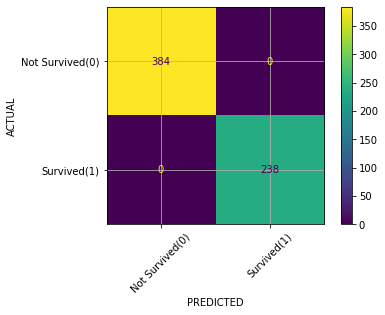

In [89]:
plot_confusion_matrix(gb_cv, X_train, y_train, values_format ='d')
plt.grid(None)
classNames = ['Not Survived(0)', 'Survived(1)']
plt.ylabel('ACTUAL')
plt.xlabel('PREDICTED')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
plt.show();

Area Under Curve: 1.000


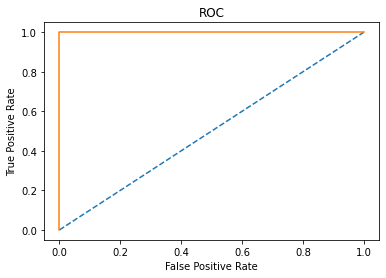

In [90]:
probs = gb_cv.predict_proba(X_train)
probs = probs[:, 1]
gb_train_auc = roc_auc_score(y_train, probs)
print('Area Under Curve: %.3f' % gb_train_auc)
gb_train_fpr, gb_train_tpr, gb_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(gb_train_fpr, gb_train_tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.show()

In [91]:
probs = gb_cv.predict_proba(X_val)
probs = probs[:, 1]
gb_val_fpr, gb_val_tpr, gb_val_thresholds = roc_curve(y_val, probs)

In [92]:
joblib.dump(gb_cv.best_estimator_, '../../../GB_model.pkl')

['../../../GB_model.pkl']


## Part 4 - Model Validation

### Importing the Pickled Models

In [93]:
models = {}

for mdl in ['LR', 'SVM', 'MLP', 'RF', 'GB']:
    models[mdl] = joblib.load('../../../{}_model.pkl'.format(mdl))

In [94]:
models

{'LR': LogisticRegression(C=0.1),
 'SVM': SVC(C=1, probability=True),
 'MLP': MLPClassifier(learning_rate='adaptive'),
 'RF': RandomForestClassifier(max_depth=4, n_estimators=50),
 'GB': GradientBoostingClassifier(max_depth=9, n_estimators=250)}

### Defining a function to evaluate & compare the models

In [95]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

### Validation & Training Metrics Comparision

#### Train Data - Accuracy, Precision, Recall, Latency

In [96]:
for name, mdl in models.items():
    evaluate_model(name, mdl, X_train, y_train)

LR -- Accuracy: 0.793 / Precision: 0.756 / Recall: 0.676 / Latency: 2.3ms
SVM -- Accuracy: 0.846 / Precision: 0.903 / Recall: 0.668 / Latency: 15.5ms
MLP -- Accuracy: 0.852 / Precision: 0.884 / Recall: 0.706 / Latency: 3.3ms
RF -- Accuracy: 0.855 / Precision: 0.916 / Recall: 0.685 / Latency: 12.7ms
GB -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 12.4ms


#### Validation Data - Accuracy, Precision, Recall, Latency

In [97]:
for name, mdl in models.items():
    evaluate_model(name, mdl, X_val, y_val)

LR -- Accuracy: 0.809 / Precision: 0.78 / Recall: 0.696 / Latency: 2.1ms
SVM -- Accuracy: 0.798 / Precision: 0.816 / Recall: 0.608 / Latency: 7.7ms
MLP -- Accuracy: 0.816 / Precision: 0.835 / Recall: 0.647 / Latency: 2.5ms
RF -- Accuracy: 0.798 / Precision: 0.824 / Recall: 0.598 / Latency: 9.2ms
GB -- Accuracy: 0.813 / Precision: 0.789 / Recall: 0.696 / Latency: 6.7ms


#### ROC - Train Data

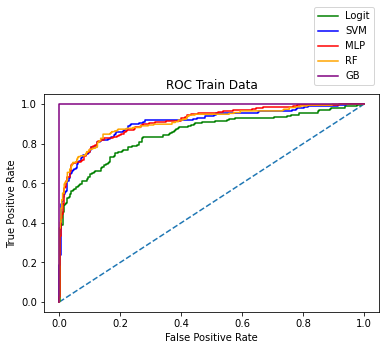

In [98]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(log_train_fpr,log_train_tpr,color='green',label="Logit")
plt.plot(svm_train_fpr, svm_train_tpr,color='blue',label="SVM")
plt.plot(mlp_train_fpr,mlp_train_tpr,color='red',label="MLP")
plt.plot(rf_train_fpr, rf_train_tpr,color='orange',label="RF")
plt.plot(gb_train_fpr,gb_train_tpr,color='purple',label="GB")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Train Data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

#### ROC - Validation Data

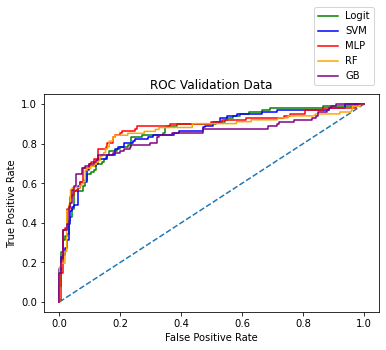

In [99]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(log_val_fpr,log_val_tpr,color='green',label="Logit")
plt.plot(svm_val_fpr, svm_val_tpr,color='blue',label="SVM")
plt.plot(mlp_val_fpr,mlp_val_tpr,color='red',label="MLP")
plt.plot(rf_val_fpr, rf_val_tpr,color='orange',label="RF")
plt.plot(gb_val_fpr,gb_val_tpr,color='purple',label="GB")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Validation Data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

#### Logistics Regression seems to perform well with less variations in the validation data

### Predicting in Test Data with Logistics Regression

In [100]:
probs = lr_cv.predict_proba(X_test)
probs = probs[:, 1]
predictions = [int(round(value)) for value in probs]

### Submitting the prediction results

In [101]:
data_submit = pd.read_csv("../input/titanic/gender_submission.csv")

In [102]:
submission = pd.DataFrame({'PassengerId': data_submit["PassengerId"], 'Survived' : predictions})
submission.to_csv('Submission.csv', index=False)

In [103]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


# END